In [ ]:
!pip install geopandas
!pip install mapclassify


In [75]:
import geopandas as gpd
PAK = gpd.read_file('gadm36_PAK_1.shp')
PAK


,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PAK,Pakistan,PAK.1_1,Azad Kashmir,Kashmir,None,Centrally Administered Area,Centrally Administered Area,None,PK.JK,"POLYGON ((74.39078 32.80176, 74.38804 32.80345..."
1,PAK,Pakistan,PAK.2_1,Baluchistan,Balochistan|BéloutchistanBeluchistan|Baluchistão,None,Province,Province,None,PK.BA,"MULTIPOLYGON (((66.60542 24.90264, 66.60542 24..."
2,PAK,Pakistan,PAK.3_1,F.A.T.A.,Federally Administered Tribal Areas,None,Territory,Territory,None,PK.TA,"POLYGON ((70.36974 31.24586, 70.36703 31.22587..."
3,PAK,Pakistan,PAK.4_1,F.C.T.,Islamabad|Federal Capital Territory|Federal Ca...,None,Capital Territory,Capital Territory,None,PK.IS,"POLYGON ((73.14516 33.80333, 73.17208 33.78874..."
4,PAK,Pakistan,PAK.5_1,N.W.F.P.,North-West Frontier Province,None,Province,Province,None,PK.NW,"POLYGON ((73.23890 33.83454, 73.23631 33.83214..."
5,PAK,Pakistan,PAK.6_1,Northern Areas,None,None,Centrally Administered Area,Centrally Administered Area,None,PK.NA,"POLYGON ((75.24538 34.90744, 75.22611 34.88849..."
6,PAK,Pakistan,PAK.7_1,Punjab,Pendjab|Penjab,None,Province,Province,None,PK.PB,"POLYGON ((71.12506 27.79225, 71.08701 27.77679..."
7,PAK,Pakistan,PAK.8_1,Sind,Sindh,None,Province,Province,None,PK.SD,"MULTIPOLYGON (((67.99069 23.76347, 67.99069 23..."


In [76]:
PAK.drop(["GID_0","NAME_0","GID_1","VARNAME_1","NL_NAME_1","TYPE_1","ENGTYPE_1","CC_1", "HASC_1"], axis =1, inplace= True)


In [77]:
PAK['Confirmed Cases'] = [1599,11185,1468,14108,20486,1671,87043,105533]
PAK

,NAME_1,geometry,Confirmed Cases
0,Azad Kashmir,"POLYGON ((74.39078 32.80176, 74.38804 32.80345...",1599
1,Baluchistan,"MULTIPOLYGON (((66.60542 24.90264, 66.60542 24...",11185
2,F.A.T.A.,"POLYGON ((70.36974 31.24586, 70.36703 31.22587...",1468
3,F.C.T.,"POLYGON ((73.14516 33.80333, 73.17208 33.78874...",14108
4,N.W.F.P.,"POLYGON ((73.23890 33.83454, 73.23631 33.83214...",20486
5,Northern Areas,"POLYGON ((75.24538 34.90744, 75.22611 34.88849...",1671
6,Punjab,"POLYGON ((71.12506 27.79225, 71.08701 27.77679...",87043
7,Sind,"MULTIPOLYGON (((67.99069 23.76347, 67.99069 23...",105533


In [78]:
PAK["NAME_1"].replace("N.W.F.P.", "KPK", inplace=True)
PAK["NAME_1"].replace("Northern Areas", "GB", inplace=True)
PAK["NAME_1"].replace("F.C.T.", "Islamabad", inplace=True)
PAK

,NAME_1,geometry,Confirmed Cases
0,Azad Kashmir,"POLYGON ((74.39078 32.80176, 74.38804 32.80345...",1599
1,Baluchistan,"MULTIPOLYGON (((66.60542 24.90264, 66.60542 24...",11185
2,F.A.T.A.,"POLYGON ((70.36974 31.24586, 70.36703 31.22587...",1468
3,Islamabad,"POLYGON ((73.14516 33.80333, 73.17208 33.78874...",14108
4,KPK,"POLYGON ((73.23890 33.83454, 73.23631 33.83214...",20486
5,GB,"POLYGON ((75.24538 34.90744, 75.22611 34.88849...",1671
6,Punjab,"POLYGON ((71.12506 27.79225, 71.08701 27.77679...",87043
7,Sind,"MULTIPOLYGON (((67.99069 23.76347, 67.99069 23...",105533


In [79]:
PAK["center"] = PAK["geometry"].centroid
za_points = PAK.copy()
za_points.set_geometry("center", inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


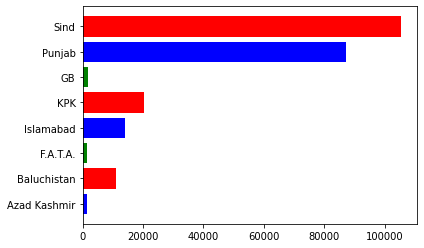

In [80]:
import matplotlib.pyplot as plt
y = PAK['Confirmed Cases']
x = PAK['NAME_1']
plt.barh(x,y, color=["blue","red","Green"])
plt.show()

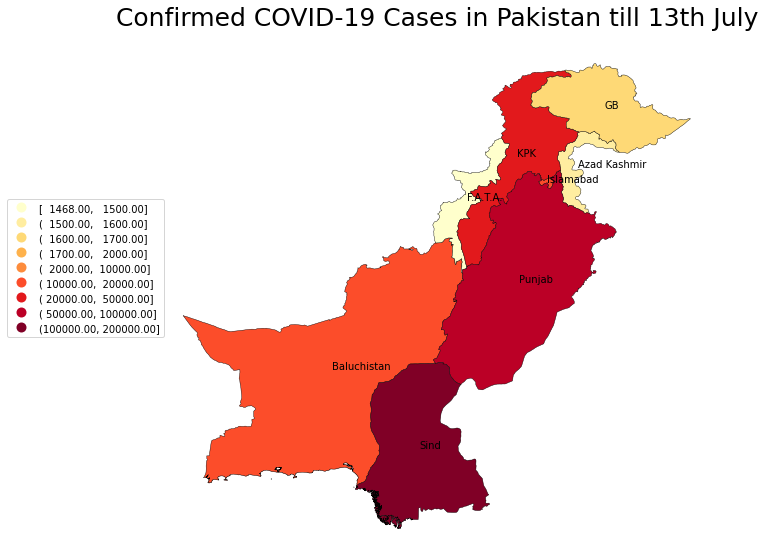

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point


x = PAK.plot(column='Confirmed Cases',
              cmap='YlOrRd',
              figsize=(10,30), 
              edgecolor='black',
              linewidth=0.4,
              legend=True,
              scheme='user_defined',
              classification_kwds={'bins':[1500,1600,1700,2000,10000,20000,50000,100000,200000]})

x.set_axis_off()
x.set_title("Confirmed COVID-19 Cases in Pakistan till 13th July",{'fontsize':25}, pad=15)
x.get_legend().set_bbox_to_anchor((0.02,0.7))
texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["NAME_1"]):
    texts.append(plt.text(x, y, label, fontsize = 10,color='black'))
